In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


from sklearn.cluster import DBSCAN

df=pd.read_csv('Downloads/testdata.csv')
df.head()

,g_case_no,y_lat,x_lng,f_addr,gf_addr,c_case_type,c_violation,c_violation_date,j_finding
0,11000001,43.091474,-87.984090,"5700 W CAPITOL DR MILWAUKEE, WI","5700 W Capitol Dr, Milwaukee, WI 53216, USA",Municipal citation,"Ordinance 110-35-1, Retail Theft",2011-01-03 14:40:00.000000,Guilty
1,11000002,43.068454,-87.918139,"2736 N 6TH ST MILWAUKEE, WI","2736 N 6th St, Milwaukee, WI 53212, USA",Municipal citation,"Ordinance 105-138-2, Resisting / Obstructing P...",2011-01-03 16:00:00.000000,Guilty
2,11000009,43.122443,-88.014475,"8223 W THURSTON AVE MILWAUKEE, WI","8223 W Thurston Ave, Milwaukee, WI 53218, USA",Summons & Complaint,"Ordinance 200 through 295, Building Code Viola...",2010-05-07 00:00:00.000000,Guilty
3,11000014,43.056875,-87.941243,"2020 N 23 ST MILWAUKEE, WI","2020 N 23rd St, Milwaukee, WI 53205, USA",Summons & Complaint,"Ordinance 200 through 295, Building Code Viola...",2010-06-08 00:00:00.000000,Guilty
4,11000024,43.054717,-87.936219,"1840 N 19 ST MILWAUKEE, WI","1840 N 19th St, Milwaukee, WI 53205, USA",Summons & Complaint,"Ordinance 200 through 295, Building Code Viola...",2010-03-30 00:00:00.000000,Guilty


In [2]:
#drops address errors outside milwaukee
df = df[(df['x_lng'] > -88.0676) & (df['x_lng'] < -87.8640)
               & (df['y_lat'] > 42.9197) & (df['y_lat'] < 43.1953)]


In [3]:
df.describe()

,g_case_no,y_lat,x_lng
count,6.494100e+04,64941.000000,64941.000000
mean,1.246262e+07,43.057872,-87.947625
std,9.150671e+05,0.045076,0.034844
min,1.100000e+07,42.922352,-88.065939
25%,1.202407e+07,43.023441,-87.964759
50%,1.213209e+07,43.061026,-87.944241
75%,1.307539e+07,43.087613,-87.922889
max,1.403377e+07,43.191584,-87.865798


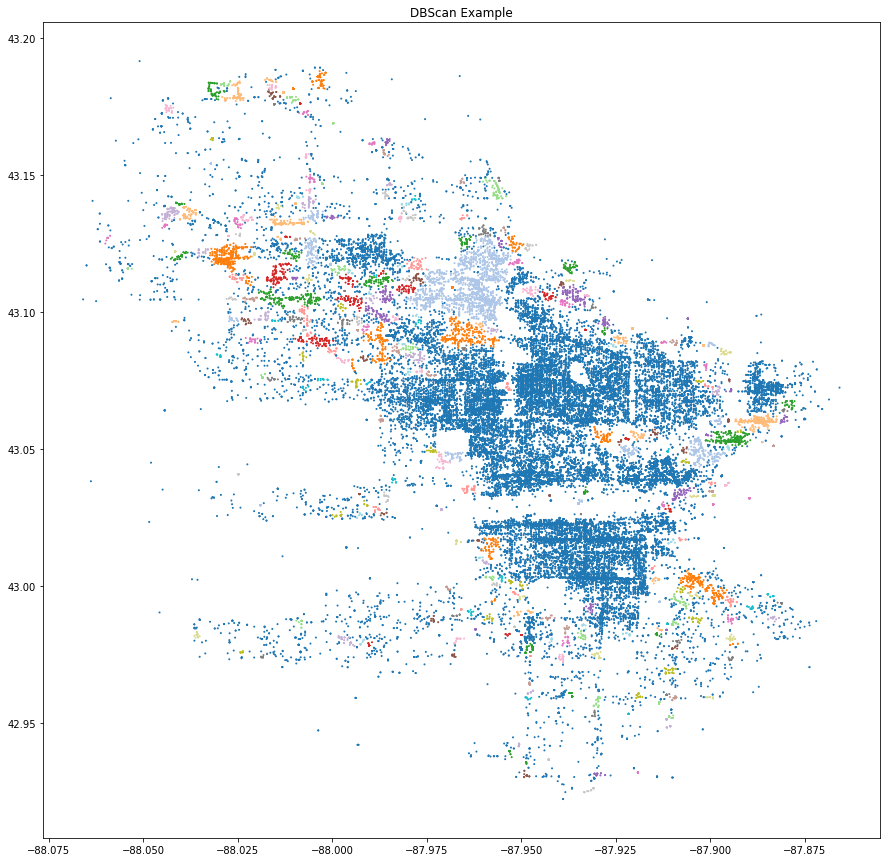

In [18]:
guilty=df[df.j_finding == 'Guilty']
guilty=guilty.append(df[df.j_finding == 'Guilty - Suspended Sentence'])
guilty2=guilty.drop_duplicates(['f_addr'], keep='first')
#notGuilty= df[! guilty]

fig=plt.figure(figsize=[15,15])

data=df
e=.0014
p=10

dbscan=DBSCAN(eps=e, min_samples=p,metric='manhattan')
labels=dbscan.fit_predict(data[['x_lng','y_lat']])

plt.scatter(data['x_lng'], data['y_lat'], s=1 ,c=labels, cmap='tab20')
plt.title('DBScan Example')

plt.show()